In [ ]:
# 1.Download the Employee Attrition Dataset
https://www.kaggle.com/datasets/patelprashant/employee-attrition
2.Perfrom Data Preprocessing
3.Model Building using Logistic Regression, Decision Tree and random forest
4.Calculate Performance metrics

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [4]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [76]:
df.shape

(1470, 35)

In [77]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [7]:
df.describe()       #descriptive statistics

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [8]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# handle null values

In [9]:
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [10]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Data Visualisation

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Density'>

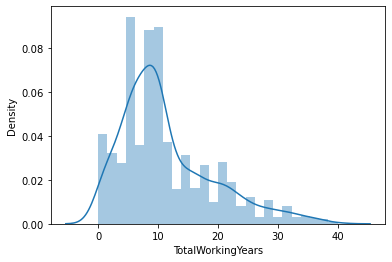

In [11]:
sns.distplot(df["TotalWorkingYears"])

<AxesSubplot:xlabel='Age', ylabel='Count'>

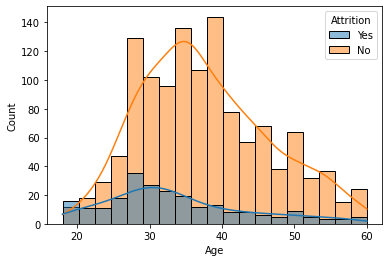

In [12]:
sns.histplot(data=df, x='Age', hue='Attrition', kde=True)


<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

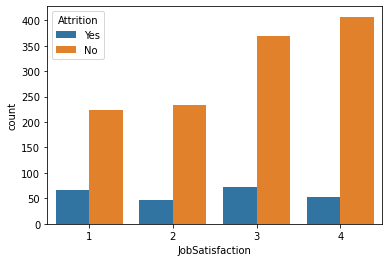

In [13]:
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)


<AxesSubplot:xlabel='MonthlyIncome', ylabel='Count'>

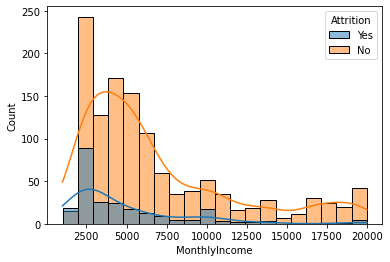

In [14]:
sns.histplot(data=df, x='MonthlyIncome', hue='Attrition', kde=True)


C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Density'>

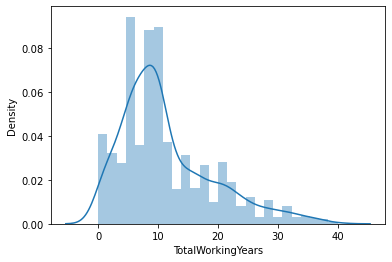

In [15]:
sns.distplot(df["TotalWorkingYears"])

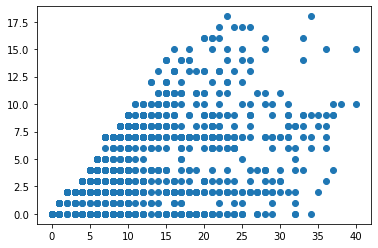

In [16]:
plt.scatter(df["TotalWorkingYears"],df["YearsInCurrentRole"])

<AxesSubplot:>

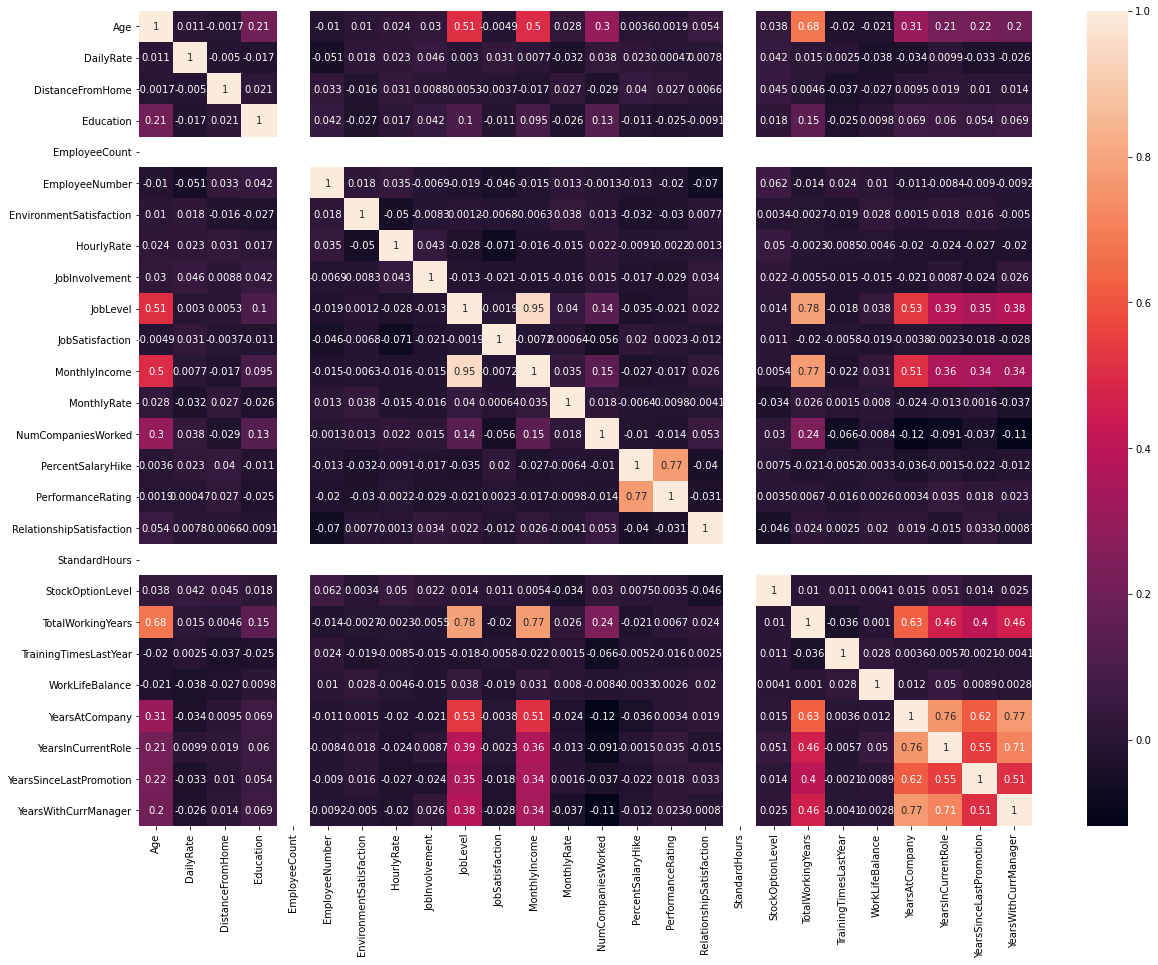

In [17]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(),annot=True)

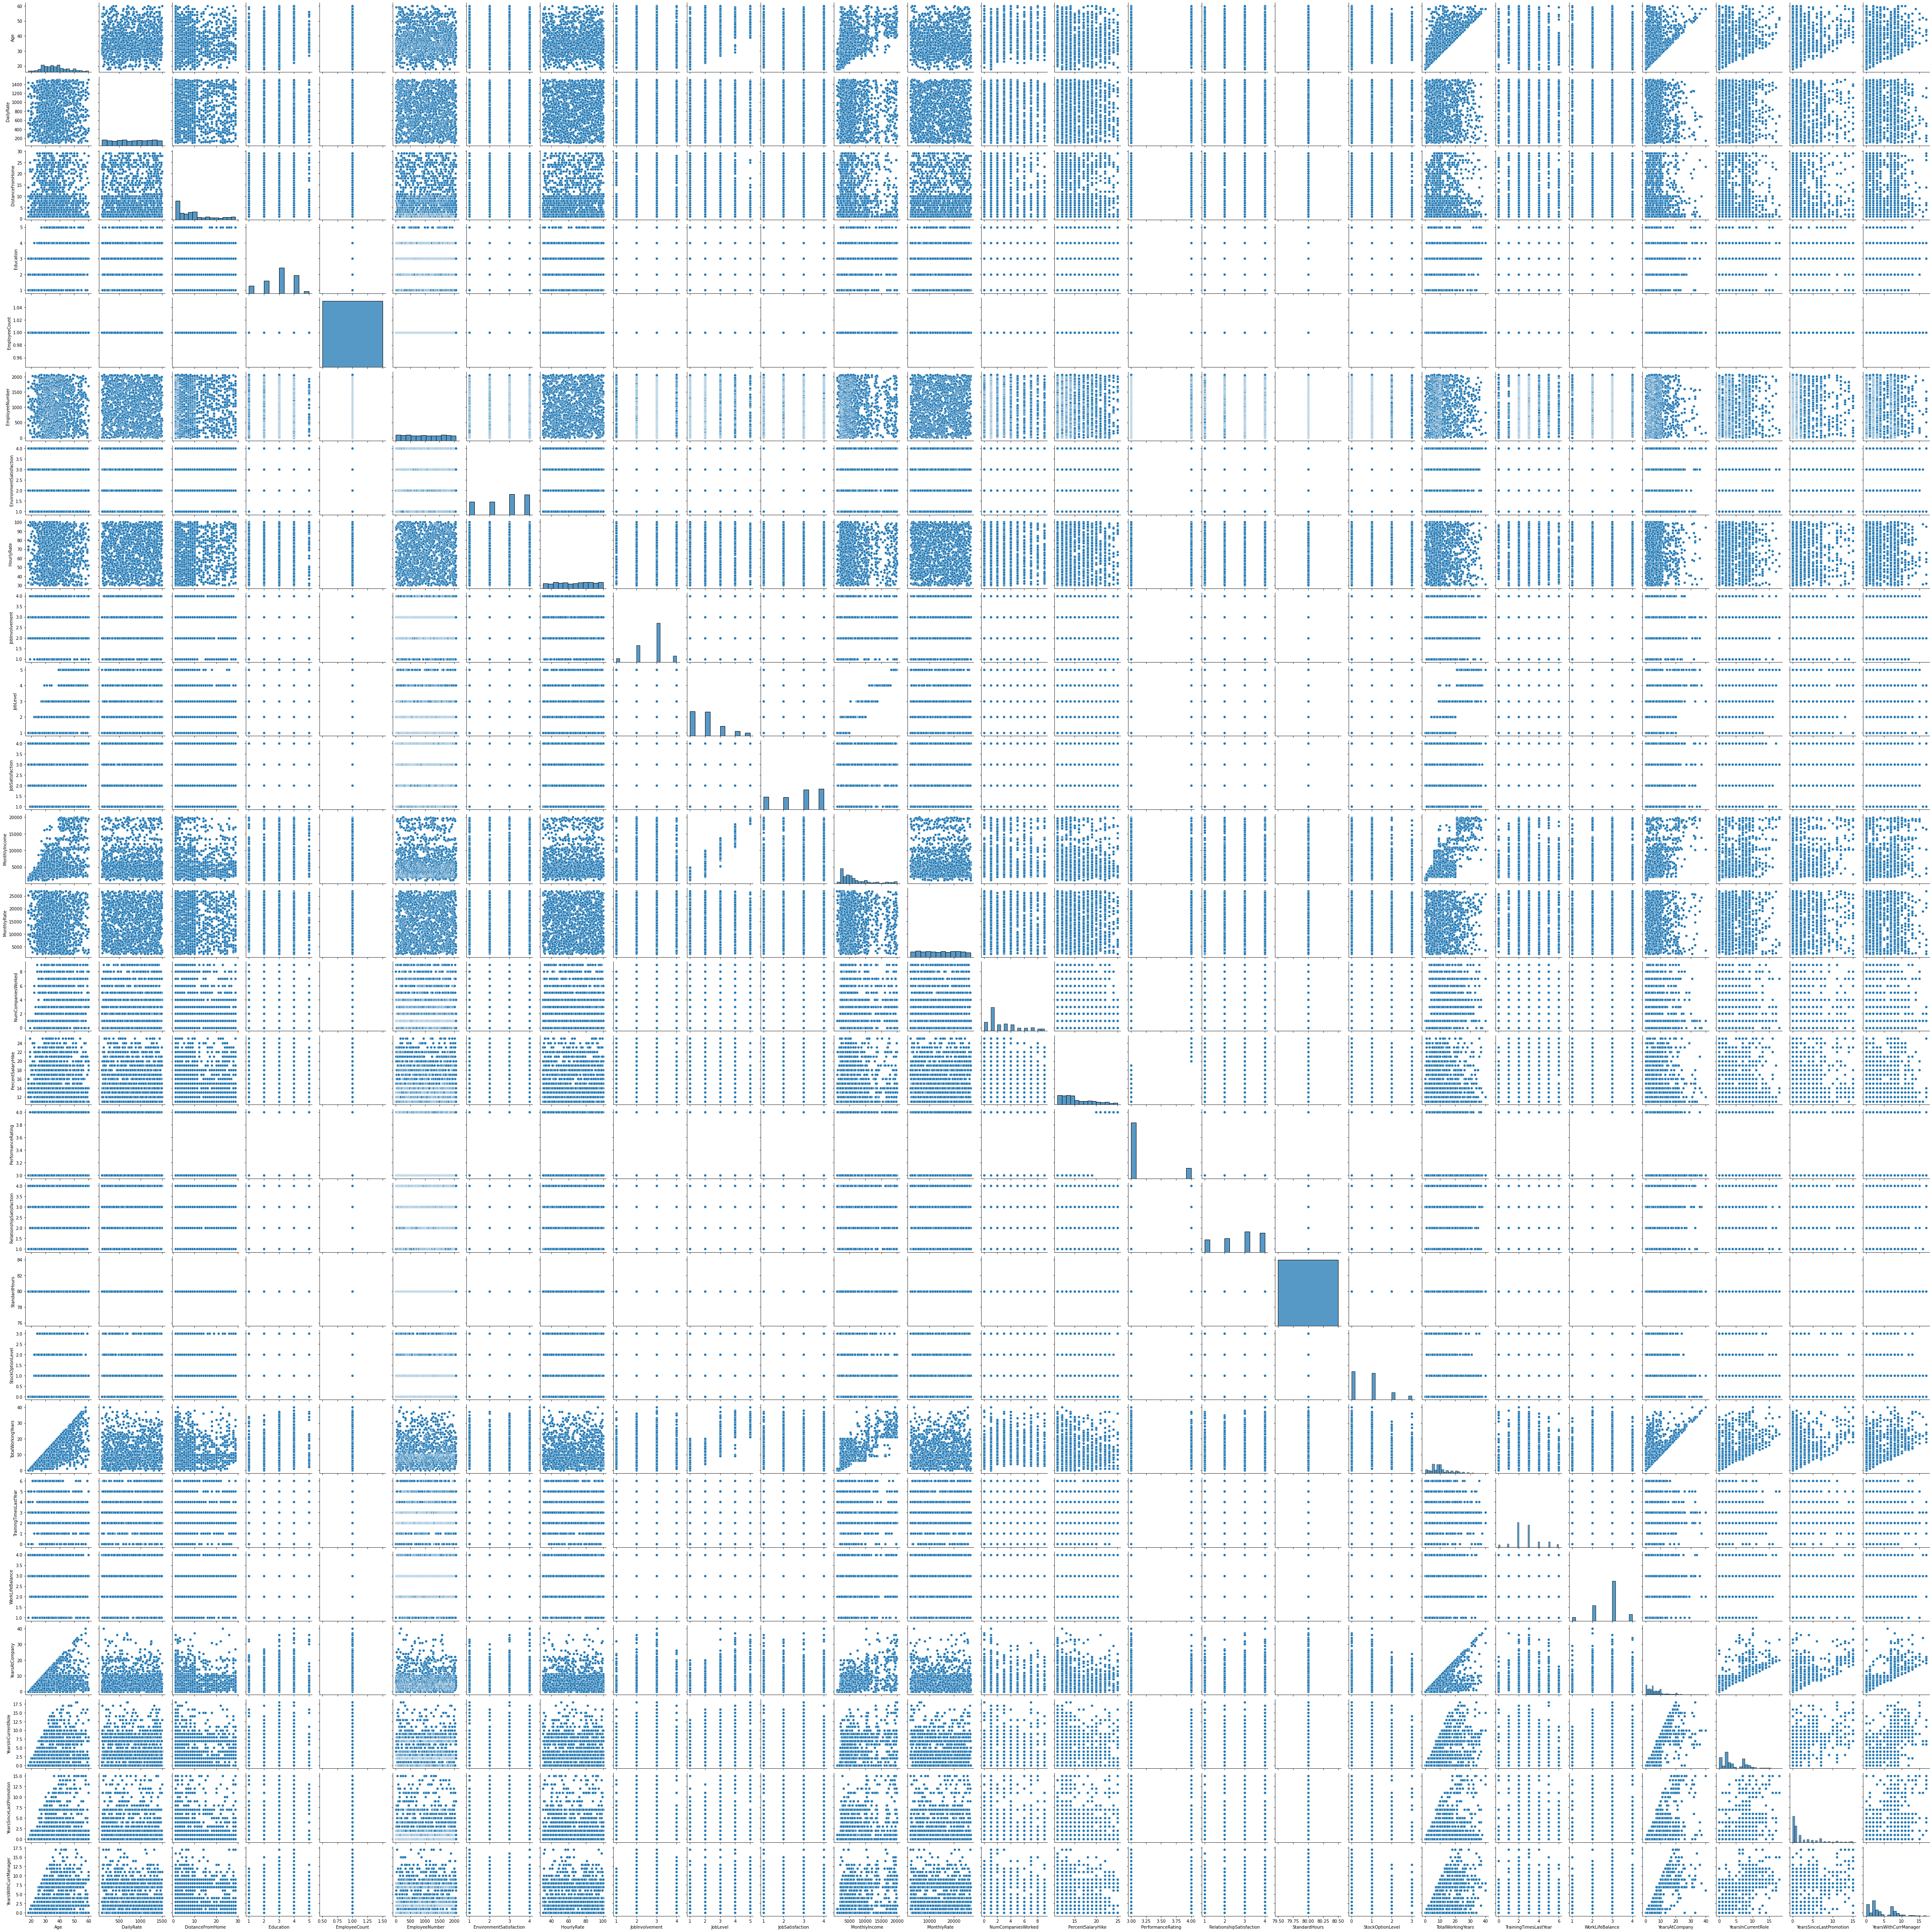

In [18]:
sns.pairplot(df)    

#  Outlier Detection


C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsSinceLastPromotion'>

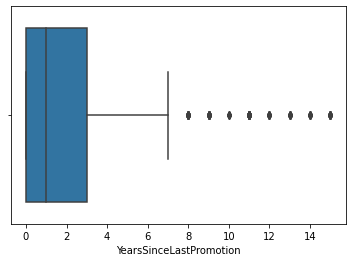

In [19]:
sns.boxplot(df.YearsSinceLastPromotion) 

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DailyRate'>

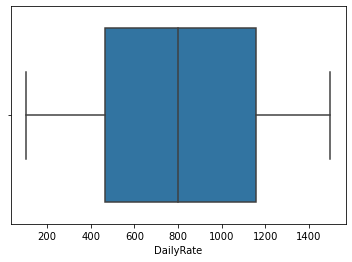

In [20]:

sns.boxplot(df.DailyRate) 

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

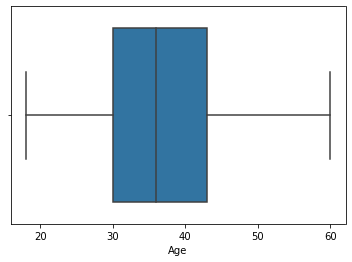

In [21]:
sns.boxplot(df['Age'])    # NO OUTLIERS

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsSinceLastPromotion'>

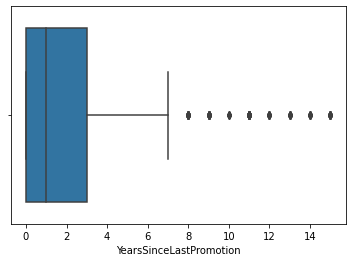

In [22]:
sns.boxplot(df.YearsSinceLastPromotion) 

In [23]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

#  Splitting Dependent and Independent variables


In [24]:
x=df.drop(columns="Attrition",axis=1)
x.head()

Age     BusinessTravel  DailyRate              Department  \
0   41      Travel_Rarely       1102                   Sales   
1   49  Travel_Frequently        279  Research & Development   
2   37      Travel_Rarely       1373  Research & Development   
3   33  Travel_Frequently       1392  Research & Development   
4   27      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  ... RelationshipSatisfaction  StandardHours  \
0                        2  ...                        1             80   
1                        3  ...                        4             80   
2                        4  ...                        2             80   
3                        4  ...                        3             80   
4                        1  ...                        4             80   

   StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0                 0                  8                     0                1   
1                 1                 10                     3                3   
2                 0                  7                     3                3   
3                 0                  8                     3                3   
4                 1                  6                     3                3   

  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0              6                   4                        0   
1             10                   7                        1   
2              0                   0                        0   
3              8                   7                        3   
4              2                   2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 34 columns]

In [25]:
#dependent var
y=df.Attrition
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

In [26]:
x.shape

(1470, 34)

In [27]:
y.shape

(1470,)

#  Encoding


In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [29]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [30]:

columns=["BusinessTravel","Department","EducationField","Gender","JobRole","MaritalStatus","Over18","OverTime"]
df[columns]=df[columns].apply(le.fit_transform)

In [31]:
x=df.drop(columns="Attrition",axis=1)
x.head()

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0   41               2       1102           2                 1          2   
1   49               1        279           1                 8          1   
2   37               2       1373           1                 2          2   
3   33               1       1392           1                 3          4   
4   27               2        591           1                 2          1   

   EducationField  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  \
0               1              1               1                        2   
1               1              1               2                        3   
2               4              1               4                        4   
3               1              1               5                        4   
4               3              1               7                        1   

   ...  RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0  ...                         1             80                 0   
1  ...                         4             80                 1   
2  ...                         2             80                 0   
3  ...                         3             80                 0   
4  ...                         4             80                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 34 columns]

In [32]:
#dependent var
y=df.Attrition
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

In [33]:
x.shape

(1470, 34)

In [34]:
y.shape

(1470,)

# Feature scaling

In [35]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
x_scaled=pd.DataFrame(ms.fit_transform(x),columns=x.columns)
x_scaled.head()

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0  0.547619             1.0   0.715820         1.0          0.000000   
1  0.738095             0.5   0.126700         0.5          0.250000   
2  0.452381             1.0   0.909807         0.5          0.035714   
3  0.357143             0.5   0.923407         0.5          0.071429   
4  0.214286             1.0   0.350036         0.5          0.035714   

   Education  EducationField  EmployeeCount  EmployeeNumber  \
0       0.25             0.2            0.0        0.000000   
1       0.00             0.2            0.0        0.000484   
2       0.25             0.8            0.0        0.001451   
3       0.75             0.2            0.0        0.001935   
4       0.00             0.6            0.0        0.002903   

   EnvironmentSatisfaction  ...  RelationshipSatisfaction  StandardHours  \
0                 0.333333  ...                  0.000000            0.0   
1                 0.666667  ...                  1.000000            0.0   
2                 1.000000  ...                  0.333333            0.0   
3                 1.000000  ...                  0.666667            0.0   
4                 0.000000  ...                  1.000000            0.0   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0          0.000000              0.200                    0.0   
1          0.333333              0.250                    0.5   
2          0.000000              0.175                    0.5   
3          0.000000              0.200                    0.5   
4          0.333333              0.150                    0.5   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0         0.000000            0.15            0.222222   
1         0.666667            0.25            0.388889   
2         0.666667            0.00            0.000000   
3         0.666667            0.20            0.388889   
4         0.666667            0.05            0.111111   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                 0.000000              0.294118  
1                 0.066667              0.411765  
2                 0.000000              0.000000  
3                 0.200000              0.000000  
4                 0.133333              0.117647  

[5 rows x 34 columns]

# Splitting Data into Train and Test.


In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=0)

In [38]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1176, 34), (294, 34), (1176,), (294,))

In [39]:
x_train.head()

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
1374  0.952381             1.0   0.360057         1.0          0.714286   
1092  0.642857             1.0   0.607015         0.5          0.964286   
768   0.523810             1.0   0.141732         1.0          0.892857   
569   0.428571             0.0   0.953472         1.0          0.250000   
911   0.166667             0.5   0.355762         1.0          0.821429   

      Education  EducationField  EmployeeCount  EmployeeNumber  \
1374       0.50             0.2            0.0        0.937107   
1092       0.50             1.0            0.0        0.747460   
768        0.50             0.4            0.0        0.515239   
569        0.75             0.2            0.0        0.381229   
911        0.00             0.2            0.0        0.615385   

      EnvironmentSatisfaction  ...  RelationshipSatisfaction  StandardHours  \
1374                 1.000000  ...                  0.666667            0.0   
1092                 1.000000  ...                  1.000000            0.0   
768                  0.666667  ...                  0.333333            0.0   
569                  0.000000  ...                  0.333333            0.0   
911                  0.666667  ...                  1.000000            0.0   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1374          0.333333              0.725               0.333333   
1092          0.333333              0.200               0.500000   
768           0.333333              0.200               0.500000   
569           0.000000              0.250               0.166667   
911           0.000000              0.025               0.666667   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
1374         0.333333           0.025            0.000000   
1092         0.666667           0.125            0.222222   
768          0.333333           0.175            0.388889   
569          0.666667           0.250            0.388889   
911          0.666667           0.025            0.000000   

      YearsSinceLastPromotion  YearsWithCurrManager  
1374                 0.000000              0.000000  
1092                 0.000000              0.176471  
768                  0.466667              0.294118  
569                  0.000000              0.529412  
911                  0.066667              0.000000  

[5 rows x 34 columns]

# •	Model Building-logistic regression
    o	Import the model building Libraries
    o	Initializing the model
    o	Training and testing the model
    o	Evaluation of Model
    o	Save the Model

In [79]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [41]:
model.fit(x_train,y_train)

LogisticRegression()

In [42]:
pred=model.predict(x_test)
pred

array(['No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', '

In [43]:
y_test

442      No
1091     No
981     Yes
785      No
1332    Yes
       ... 
1439     No
481      No
124     Yes
198      No
1229     No
Name: Attrition, Length: 294, dtype: object

In [44]:
#evlauation metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [45]:
accuracy_score(y_test,pred)

0.8843537414965986

In [46]:
confusion_matrix(y_test,pred)

array([[242,   3],
       [ 31,  18]], dtype=int64)

In [47]:
pd.crosstab(y_test,pred)

col_0       No  Yes
Attrition          
No         242    3
Yes         31   18

In [48]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          No       0.89      0.99      0.93       245
         Yes       0.86      0.37      0.51        49

    accuracy                           0.88       294
   macro avg       0.87      0.68      0.72       294
weighted avg       0.88      0.88      0.86       294



In [49]:
probability=model.predict_proba(x_test)[:,1]
probability

array([0.16000127, 0.20600667, 0.31532384, 0.09242886, 0.63667551,
       0.06153061, 0.61819432, 0.0757087 , 0.00841372, 0.3912069 ,
       0.05398439, 0.33293123, 0.02020698, 0.67215483, 0.19786547,
       0.03454902, 0.11043981, 0.17101703, 0.04477777, 0.22783614,
       0.2335018 , 0.01553905, 0.06464492, 0.05029956, 0.58792413,
       0.44849464, 0.07412714, 0.04460935, 0.67666632, 0.0584383 ,
       0.01599026, 0.03521098, 0.06963085, 0.17397462, 0.07830857,
       0.04288032, 0.08150424, 0.07106342, 0.03622137, 0.05223965,
       0.04862098, 0.02091497, 0.01819361, 0.01362467, 0.02873997,
       0.50236969, 0.41553218, 0.00306874, 0.73976412, 0.51382382,
       0.09637213, 0.48845516, 0.08036228, 0.25757243, 0.66516772,
       0.26308027, 0.01964858, 0.30198497, 0.02919946, 0.16038964,
       0.02102747, 0.21670232, 0.13981568, 0.0358316 , 0.37208403,
       0.03002317, 0.29091186, 0.16041142, 0.10437497, 0.08695177,
       0.08217589, 0.30984518, 0.08531362, 0.07420689, 0.12268

# •Model Building-decision tree
  
    o	Import the model building Libraries
    o	Initializing the model
    o	Training and testing the model
    o	Evaluation of Model
    o	Save the Model

In [50]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [51]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [52]:
pred=dtc.predict(x_test)
pred

array(['No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes',
       'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', '

In [53]:
y_test

442      No
1091     No
981     Yes
785      No
1332    Yes
       ... 
1439     No
481      No
124     Yes
198      No
1229     No
Name: Attrition, Length: 294, dtype: object

In [54]:
df

Age Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41       Yes               2       1102           2                 1   
1      49        No               1        279           1                 8   
2      37       Yes               2       1373           1                 2   
3      33        No               1       1392           1                 3   
4      27        No               2        591           1                 2   
...   ...       ...             ...        ...         ...               ...   
1465   36        No               1        884           1                23   
1466   39        No               2        613           1                 6   
1467   27        No               2        155           1                 4   
1468   49        No               1       1023           2                 2   
1469   34        No               2        628           1                 8   

      Education  EducationField  EmployeeCount  EmployeeNumber  ...  \
0             2               1              1               1  ...   
1             1               1              1               2  ...   
2             2               4              1               4  ...   
3             4               1              1               5  ...   
4             1               3              1               7  ...   
...         ...             ...            ...             ...  ...   
1465          2               3              1            2061  ...   
1466          1               3              1            2062  ...   
1467          3               1              1            2064  ...   
1468          3               3              1            2065  ...   
1469          3               3              1            2068  ...   

      RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                            1             80                 0   
1                            4             80                 1   
2                            2             80                 0   
3                            3             80                 0   
4                            4             80                 1   
...                        ...            ...               ...   
1465                         3             80                 1   
1466                         1             80                 1   
1467                         2             80                 1   
1468                         4             80                 0   
1469                         1             80                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
1465               5                   2                        0   
1466               7          

In [55]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [56]:
accuracy_score(y_test,pred)

0.7448979591836735

In [57]:
confusion_matrix(y_test,pred)   

array([[202,  43],
       [ 32,  17]], dtype=int64)

In [58]:
pd.crosstab(y_test,pred)

col_0       No  Yes
Attrition          
No         202   43
Yes         32   17

In [59]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          No       0.86      0.82      0.84       245
         Yes       0.28      0.35      0.31        49

    accuracy                           0.74       294
   macro avg       0.57      0.59      0.58       294
weighted avg       0.77      0.74      0.75       294



In [60]:
Probability=dtc.predict_proba(x_test)[:,1]
Probability

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 1.

In [ ]:
#roc curve
fpr,tpr,thresholds=roc_curve(y_test,Probability)

In [ ]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

[Text(457.3522928839733, 792.75, 'X[27] <= 0.038\ngini = 0.269\nsamples = 1176\nvalue = [988, 188]'),
 Text(111.78631051752922, 747.45, 'X[16] <= 0.75\ngini = 0.5\nsamples = 78\nvalue = [39, 39]'),
 Text(69.86644407345577, 702.15, 'X[4] <= 0.554\ngini = 0.426\nsamples = 39\nvalue = [27, 12]'),
 Text(46.57762938230384, 656.85, 'X[15] <= 0.167\ngini = 0.312\nsamples = 31\nvalue = [25, 6]'),
 Text(27.946577629382304, 611.55, 'X[21] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(18.631051752921536, 566.25, 'X[17] <= 0.056\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(9.315525876460768, 520.95, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(27.946577629382304, 520.95, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(37.26210350584307, 566.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(65.20868113522538, 611.55, 'X[19] <= 0.056\ngini = 0.153\nsamples = 24\nvalue = [22, 2]'),
 Text(55.89315525876461, 566.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(74.5242

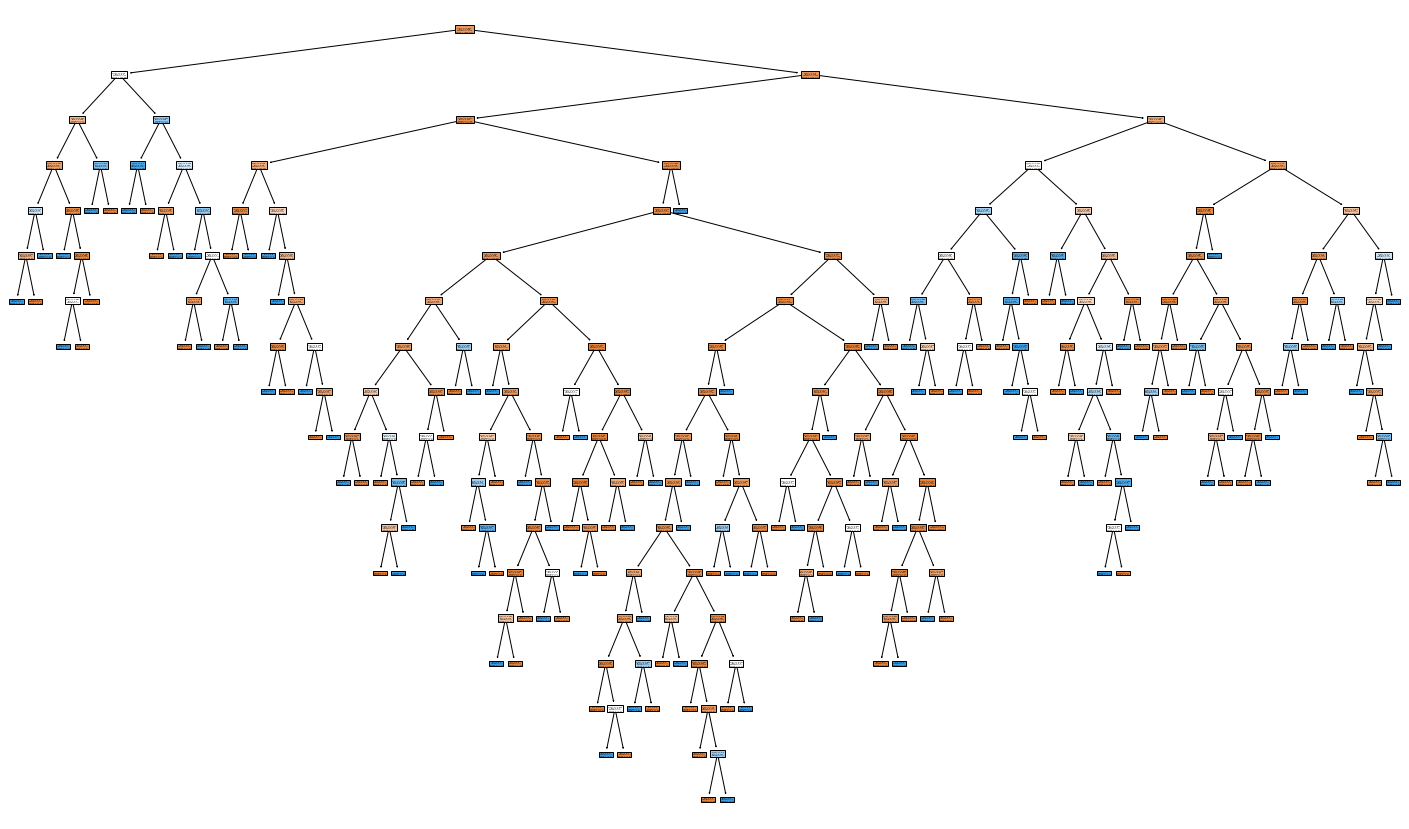

In [62]:
from sklearn import tree      #DECISION TREE
plt.figure(figsize=(25,15))
tree.plot_tree(dtc,filled=True)

In [63]:
from sklearn.model_selection import GridSearchCV     #GridSearchCV for tuning parameters
parameter={
 'criterion':['gini','entropy'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']

}

In [64]:
grid_search=GridSearchCV(estimator=dtc,param_grid=parameter,cv=5,scoring="accuracy")

In [65]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [66]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [67]:
dtc_cv=DecisionTreeClassifier(
criterion='gini',
 max_depth = 5,
 max_features= 'auto',
 splitter= 'best')
dtc_cv.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, max_features='auto')

In [68]:
pred=dtc_cv.predict(x_test)

In [69]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          No       0.85      0.94      0.90       245
         Yes       0.39      0.18      0.25        49

    accuracy                           0.82       294
   macro avg       0.62      0.56      0.57       294
weighted avg       0.78      0.82      0.79       294



# •Model Building-Random forest 
  
    o	Import the model building Libraries
    o	Initializing the model
    o	Training and testing the model
    o	Evaluation of Model
    o	Save the Model

In [70]:
# combination of all decision trees
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [71]:
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

In [72]:
from sklearn.model_selection import GridSearchCV     #GridSearchCV for tuning parameters

rfc_cv=GridSearchCV(rfc,forest_params,cv=10,scoring="accuracy")

In [73]:
rfc_cv.fit(x_train,y_train)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ACER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ACER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\ACER\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\ACER\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\ACER\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  Fil

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='accuracy')

In [74]:
pred=rfc_cv.predict(x_test)

In [75]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          No       0.86      0.99      0.92       245
         Yes       0.80      0.16      0.27        49

    accuracy                           0.85       294
   macro avg       0.83      0.58      0.59       294
weighted avg       0.85      0.85      0.81       294

